In [277]:
import pandas as pd
import numpy as np
import sqlite3

## Acquiring Soil Nutrients and Sample Data from the SQL DB

In [278]:
# Connect to the database. If it does not exist, it will be created
conn = sqlite3.connect(r'C:\Users\15404\Documents\GitHub\research_project\sql_db\test3.db')
# Create a cursor object. This is how we interact with the database
curs = conn.cursor()


### IMPORTANT!!! ###
# By default, sqlite does not enforce foreign key constraints. 
# According to the documentation, this is for backwards compatibility. You have to turn them on yourself.
curs.execute('PRAGMA foreign_keys=ON;')

finaldf = pd.read_sql("""SELECT * FROM tSoilNutrients
                      JOIN tSample ON tSoilNutrients.sample_id = tSample.sample_id;""", conn)

conn.close()

In [279]:
finaldf.head()

,sample_id,OM,ENR,CEC,pH,BpH,Phosphorus,Potassium,Calcium,Magnesium,Sulfur,Sodium,Zinc,Manganese,Iron,Copper,Boron,sample_id,site_id,collect_date
0,BLDTT0,4.3,124.0,8.1,6.8,6.91,18.0,180.0,1193.0,178.0,3.0,7.0,2.3,321.0,78.0,1.5,0.5,BLDTT0,BLD,6/29/2020
1,BLDTT1,4.8,132.0,9.5,6.8,6.90,14.0,158.0,1375.0,226.0,4.0,9.0,2.5,310.0,89.0,1.5,0.7,BLDTT1,BLD,6/29/2020
2,BLDTT2,4.9,135.0,9.0,6.8,6.90,15.0,177.0,1335.0,188.0,3.0,7.0,3.0,308.0,68.0,1.4,0.6,BLDTT2,BLD,6/29/2020
3,BLDTT3,5.6,147.0,10.2,7.0,6.93,16.0,249.0,1498.0,247.0,5.0,8.0,3.1,328.0,70.0,1.5,0.8,BLDTT3,BLD,6/29/2020
4,BLDTT4,5.4,145.0,9.1,6.9,6.92,13.0,143.0,1284.0,266.0,8.0,9.0,3.0,324.0,84.0,1.8,0.7,BLDTT4,BLD,6/29/2020


In [280]:
finaldf.shape

(368, 20)

In [281]:
newdf = finaldf

In [282]:
#drop duplicate columns
newdf = newdf.T.drop_duplicates().T
newdf.head()

,sample_id,OM,ENR,CEC,pH,BpH,Phosphorus,Potassium,Calcium,Magnesium,Sulfur,Sodium,Zinc,Manganese,Iron,Copper,Boron,site_id,collect_date
0,BLDTT0,4.3,124,8.1,6.8,6.91,18,180,1193,178,3,7,2.3,321,78,1.5,0.5,BLD,6/29/2020
1,BLDTT1,4.8,132,9.5,6.8,6.9,14,158,1375,226,4,9,2.5,310,89,1.5,0.7,BLD,6/29/2020
2,BLDTT2,4.9,135,9,6.8,6.9,15,177,1335,188,3,7,3,308,68,1.4,0.6,BLD,6/29/2020
3,BLDTT3,5.6,147,10.2,7,6.93,16,249,1498,247,5,8,3.1,328,70,1.5,0.8,BLD,6/29/2020
4,BLDTT4,5.4,145,9.1,6.9,6.92,13,143,1284,266,8,9,3,324,84,1.8,0.7,BLD,6/29/2020


In [283]:
newdf.shape

(368, 19)

In [284]:
newdf['OM'].shape

(368,)

In [285]:
newdf['site_id'].shape

(368,)

## Visualize each Nutrient

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
cols = newdf.columns.drop(['sample_id', 'site_id', 'collect_date']) 
newdf[cols] = newdf[cols].astype(float)

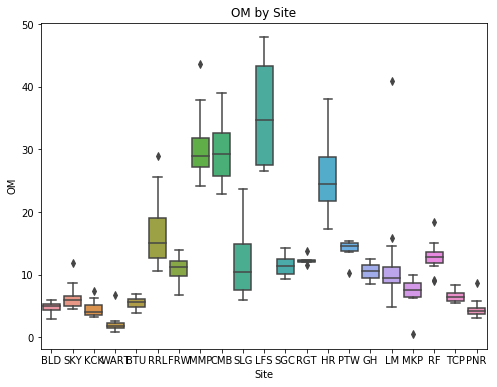

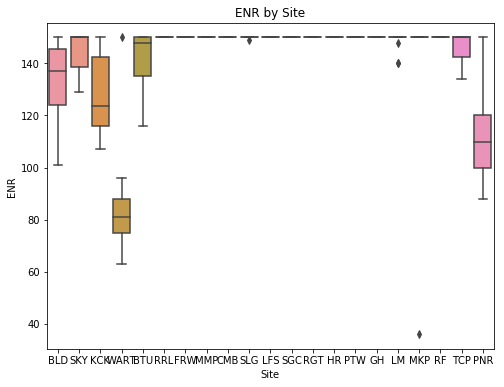

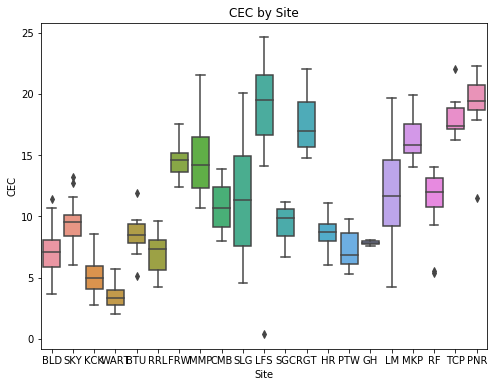

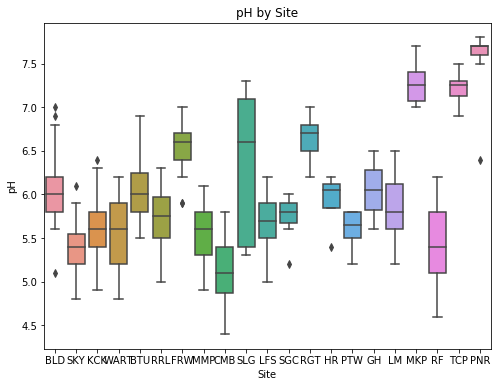

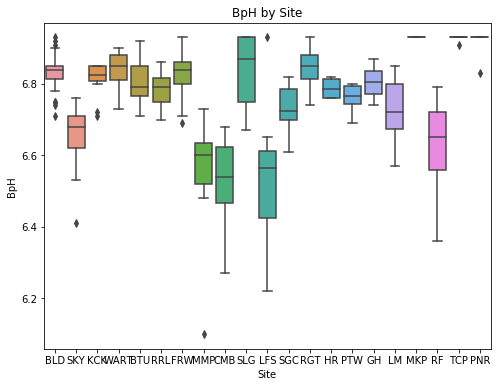

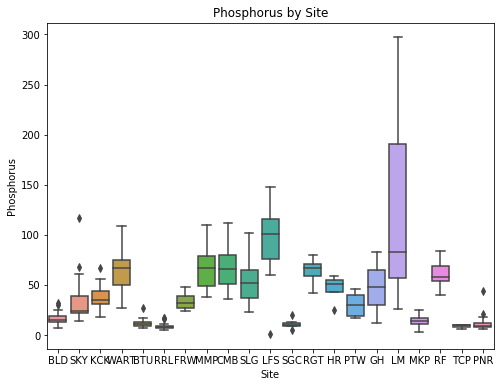

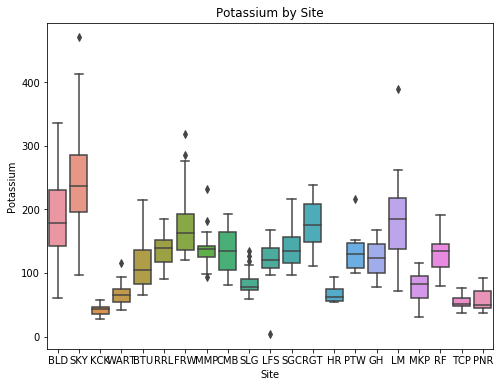

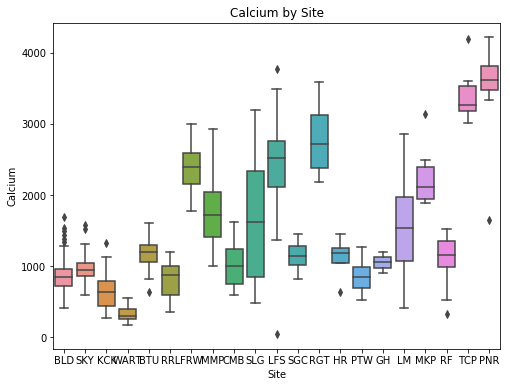

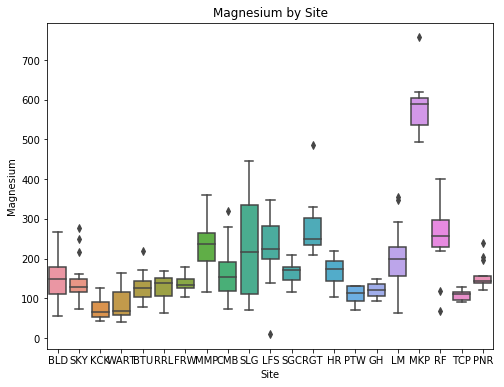

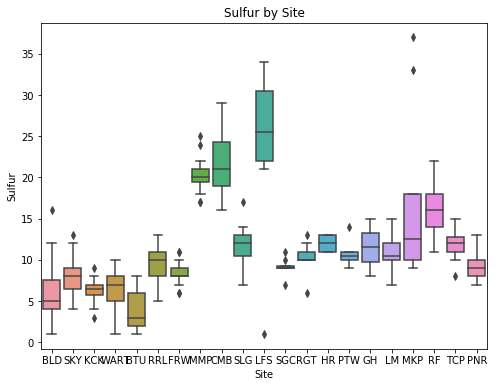

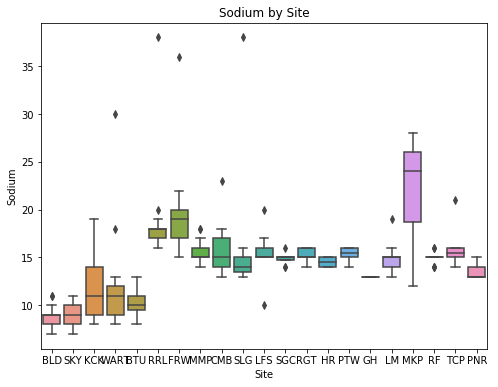

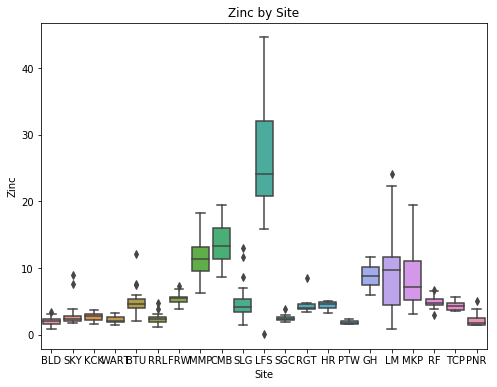

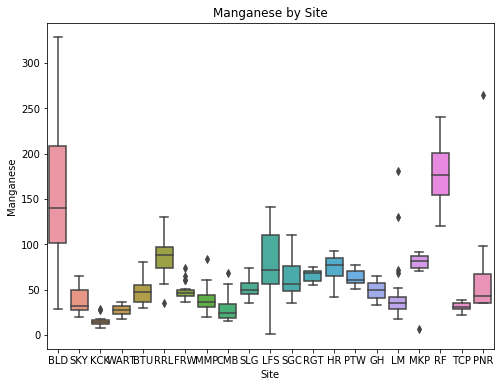

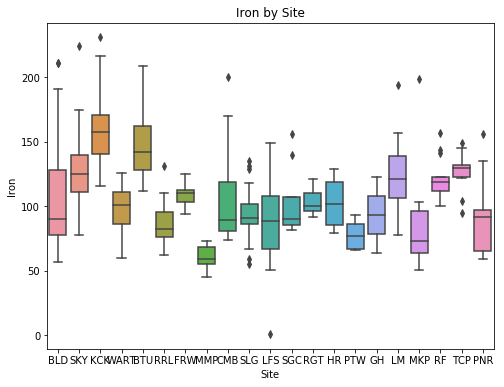

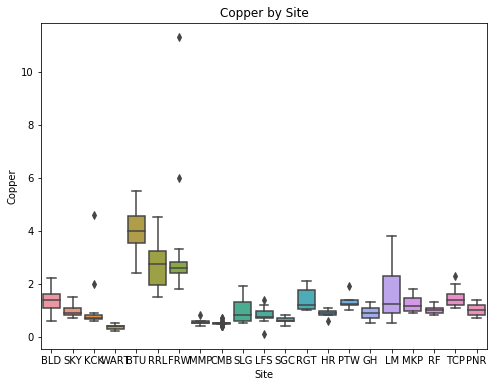

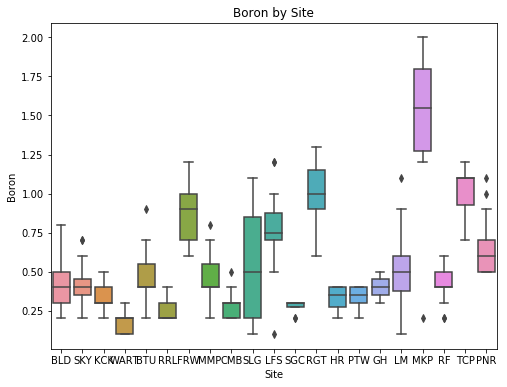

In [288]:
col_names = newdf.columns
col_names = col_names.drop(['sample_id', 'site_id', 'collect_date'])

for i in col_names:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='site_id', y=i, data=newdf)
    plt.title(i + ' by Site')
    plt.xlabel('Site')
    plt.ylabel(i)
    plt.show()

## Perform PCA by Site

In [289]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

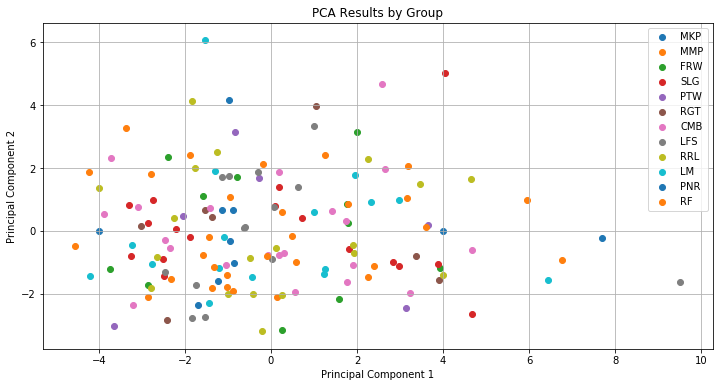

In [290]:
# Step 3: Standardize features separately for each group
grouped = df.groupby('site_id')
pca_results = {}

for group, group_data in grouped:
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(group_data[col_names])

    # Step 4: Create a PCA instance
    pca = PCA(n_components=2)  # You can adjust the number of components as needed

    # Step 5: Fit the PCA model to the standardized data
    pca.fit(scaled_features)

    # Step 6: Transform the standardized data into the principal component space
    pca_data = pca.transform(scaled_features)

    pca_results[group] = pca_data

# Step 7: Visualize the PCA results for each group
plt.figure(figsize=(12, 6))

for group, pca_data in pca_results.items():
    plt.scatter(pca_data[:, 0], pca_data[:, 1], label=group)

plt.title('PCA Results by Group')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

## Perform TSNE by Site

In [322]:
from sklearn.manifold import TSNE

### Perplexity Emphasizing Local Structure

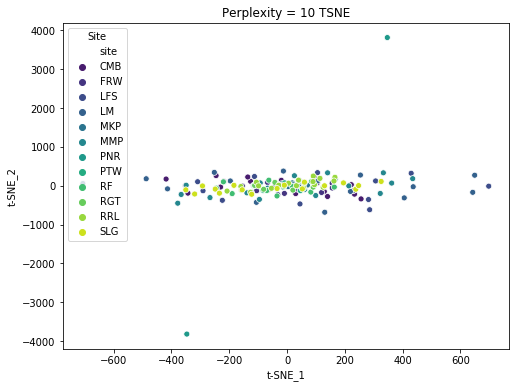

In [327]:
grouped = df.groupby('site_id')

# Initialize a DataFrame to store the t-SNE results
tsne_results = pd.DataFrame(columns=['t-SNE_1', 't-SNE_2', 'site'])

perplexity_value = 10 # Change this to your desired perplexity

# Step 4: Apply t-SNE to each group
for group_name, group_data in grouped:
    scaler = StandardScaler()
    features = scaler.fit_transform(group_data[col_names])
    
    # Step 5: Perform t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    tsne_transformed = tsne.fit_transform(features)
    
    # Combine the t-SNE results with the 'site' column
    tsne_df = pd.DataFrame(tsne_transformed, columns=['t-SNE_1', 't-SNE_2'])
    tsne_df['site'] = group_name
    
    # Append to the results DataFrame
    tsne_results = tsne_results.append(tsne_df, ignore_index=True)

# Step 6: Visualize the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_results, x='t-SNE_1', y='t-SNE_2', hue='site', palette='viridis')
plt.title('Perplexity = 10 TSNE')
plt.legend(title='Site')
plt.show()

### Perplexity Emphasizing Global Structure

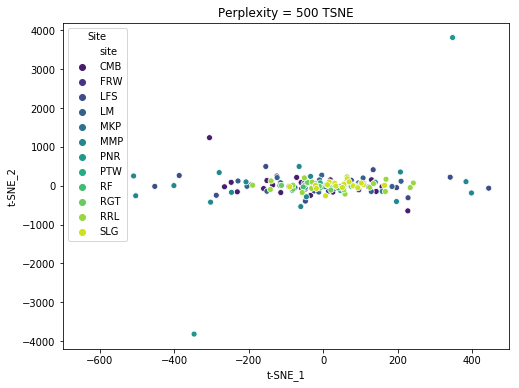

In [328]:
grouped = df.groupby('site_id')

# Initialize a DataFrame to store the t-SNE results
tsne_results = pd.DataFrame(columns=['t-SNE_1', 't-SNE_2', 'site'])

perplexity_value = 500 # Change this to your desired perplexity

# Step 4: Apply t-SNE to each group
for group_name, group_data in grouped:
    scaler = StandardScaler()
    features = scaler.fit_transform(group_data[col_names])
    
    # Step 5: Perform t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    tsne_transformed = tsne.fit_transform(features)
    
    # Combine the t-SNE results with the 'site' column
    tsne_df = pd.DataFrame(tsne_transformed, columns=['t-SNE_1', 't-SNE_2'])
    tsne_df['site'] = group_name
    
    # Append to the results DataFrame
    tsne_results = tsne_results.append(tsne_df, ignore_index=True)

# Step 6: Visualize the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_results, x='t-SNE_1', y='t-SNE_2', hue='site', palette='viridis')
plt.title('Perplexity = 500 TSNE')
plt.legend(title='Site')
plt.show()

### Balanced Perplexity

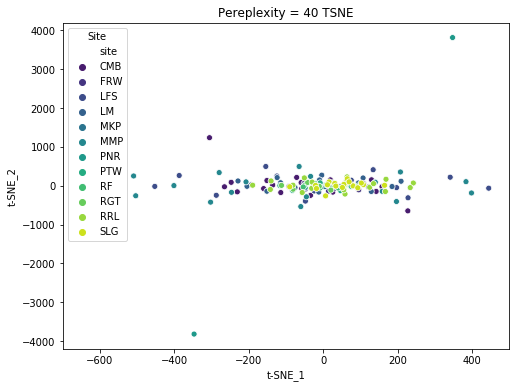

In [329]:
grouped = df.groupby('site_id')

# Initialize a DataFrame to store the t-SNE results
tsne_results = pd.DataFrame(columns=['t-SNE_1', 't-SNE_2', 'site'])

perplexity_value = 40 # Change this to your desired perplexity

# Step 4: Apply t-SNE to each group
for group_name, group_data in grouped:
    scaler = StandardScaler()
    features = scaler.fit_transform(group_data[col_names])
    
    # Step 5: Perform t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    tsne_transformed = tsne.fit_transform(features)
    
    # Combine the t-SNE results with the 'site' column
    tsne_df = pd.DataFrame(tsne_transformed, columns=['t-SNE_1', 't-SNE_2'])
    tsne_df['site'] = group_name
    
    # Append to the results DataFrame
    tsne_results = tsne_results.append(tsne_df, ignore_index=True)

# Step 6: Visualize the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_results, x='t-SNE_1', y='t-SNE_2', hue='site', palette='viridis')
plt.title('Pereplexity = 40 TSNE')
plt.legend(title='Site')
plt.show()

## 3D TSNE Visualization of Soil Nutrients

In [309]:
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

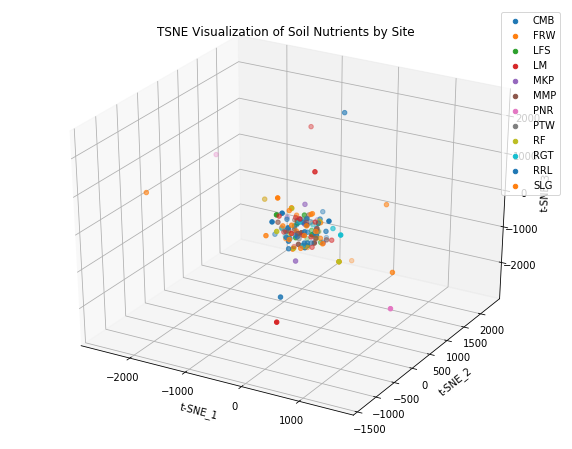

In [320]:
# Initialize a DataFrame to store the t-SNE results with 3 components
tsne_results = pd.DataFrame(columns=['t-SNE_1', 't-SNE_2', 't-SNE_3', 'site'])

# Adjust perplexity and n_components here
perplexity_value = 40  # Change this to your desired perplexity
n_components = 3  # Change to 3 for 3D visualization

# Apply t-SNE to each group
for group_name, group_data in grouped:
    features = group_data[col_names]
    
    # Perform t-SNE with the specified perplexity and 3 components
    tsne = TSNE(n_components=n_components, perplexity=perplexity_value, random_state=42)
    tsne_transformed = tsne.fit_transform(features)
    
    # Combine the t-SNE results with the 'site' column
    tsne_df = pd.DataFrame(tsne_transformed, columns=['t-SNE_1', 't-SNE_2', 't-SNE_3'])
    tsne_df['site'] = group_name
    
    # Append to the results DataFrame
    tsne_results = tsne_results.append(tsne_df, ignore_index=True)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each group
for group_name, group_data in tsne_results.groupby('site'):
    ax.scatter(group_data['t-SNE_1'], group_data['t-SNE_2'], group_data['t-SNE_3'], label=group_name)

ax.set_xlabel('t-SNE_1')
ax.set_ylabel('t-SNE_2')
ax.set_zlabel('t-SNE_3')
ax.set_title('3D TSNE Visualization of Soil Nutrients by Site')
ax.legend()
plt.show()

## Again but Dropping Estimated Nitrogen Release

In [332]:
col_names = col_names.drop(['ENR'])

KeyError: "['ENR'] not found in axis"

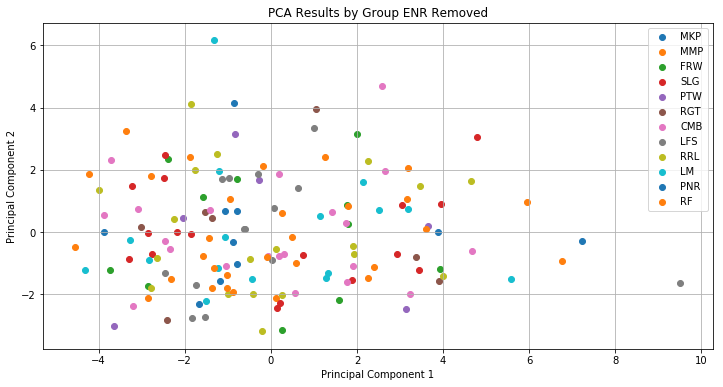

In [345]:
# Step 3: Standardize features separately for each group
grouped = df.groupby('site_id')
pca_results = {}

for group, group_data in grouped:
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(group_data[col_names])

    # Step 4: Create a PCA instance
    pca = PCA(n_components=2)  # You can adjust the number of components as needed

    # Step 5: Fit the PCA model to the standardized data
    pca.fit(scaled_features)

    # Step 6: Transform the standardized data into the principal component space
    pca_data = pca.transform(scaled_features)

    pca_results[group] = pca_data

# Step 7: Visualize the PCA results for each group
plt.figure(figsize=(12, 6))

for group, pca_data in pca_results.items():
    plt.scatter(pca_data[:, 0], pca_data[:, 1], label=group)

plt.title('PCA Results by Group ENR Removed')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

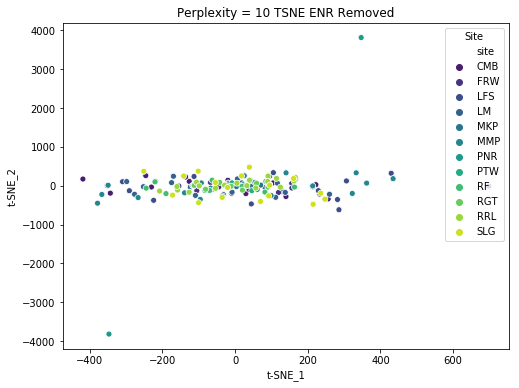

In [346]:
grouped = df.groupby('site_id')

# Initialize a DataFrame to store the t-SNE results
tsne_results = pd.DataFrame(columns=['t-SNE_1', 't-SNE_2', 'site'])

perplexity_value = 10 # Change this to your desired perplexity

# Step 4: Apply t-SNE to each group
for group_name, group_data in grouped:
    scaler = StandardScaler()
    features = scaler.fit_transform(group_data[col_names])
    
    # Step 5: Perform t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    tsne_transformed = tsne.fit_transform(features)
    
    # Combine the t-SNE results with the 'site' column
    tsne_df = pd.DataFrame(tsne_transformed, columns=['t-SNE_1', 't-SNE_2'])
    tsne_df['site'] = group_name
    
    # Append to the results DataFrame
    tsne_results = tsne_results.append(tsne_df, ignore_index=True)

# Step 6: Visualize the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_results, x='t-SNE_1', y='t-SNE_2', hue='site', palette='viridis')
plt.title('Perplexity = 10 TSNE ENR Removed')
plt.legend(title='Site')
plt.show()

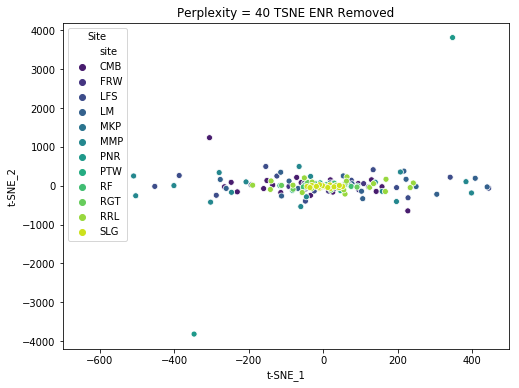

In [347]:
grouped = df.groupby('site_id')

# Initialize a DataFrame to store the t-SNE results
tsne_results = pd.DataFrame(columns=['t-SNE_1', 't-SNE_2', 'site'])

perplexity_value = 40 # Change this to your desired perplexity

# Step 4: Apply t-SNE to each group
for group_name, group_data in grouped:
    scaler = StandardScaler()
    features = scaler.fit_transform(group_data[col_names])
    
    # Step 5: Perform t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    tsne_transformed = tsne.fit_transform(features)
    
    # Combine the t-SNE results with the 'site' column
    tsne_df = pd.DataFrame(tsne_transformed, columns=['t-SNE_1', 't-SNE_2'])
    tsne_df['site'] = group_name
    
    # Append to the results DataFrame
    tsne_results = tsne_results.append(tsne_df, ignore_index=True)

# Step 6: Visualize the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_results, x='t-SNE_1', y='t-SNE_2', hue='site', palette='viridis')
plt.title('Perplexity = 40 TSNE ENR Removed')
plt.legend(title='Site')
plt.show()

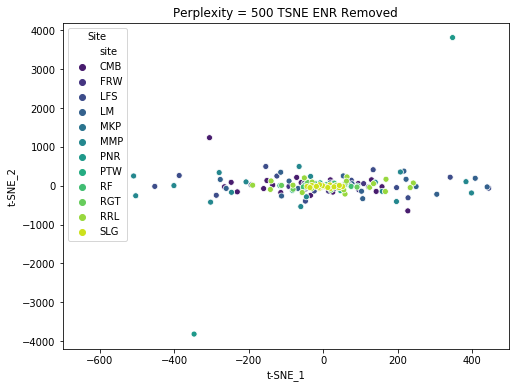

In [348]:
grouped = df.groupby('site_id')

# Initialize a DataFrame to store the t-SNE results
tsne_results = pd.DataFrame(columns=['t-SNE_1', 't-SNE_2', 'site'])

perplexity_value = 500 # Change this to your desired perplexity

# Step 4: Apply t-SNE to each group
for group_name, group_data in grouped:
    scaler = StandardScaler()
    features = scaler.fit_transform(group_data[col_names])
    
    # Step 5: Perform t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    tsne_transformed = tsne.fit_transform(features)
    
    # Combine the t-SNE results with the 'site' column
    tsne_df = pd.DataFrame(tsne_transformed, columns=['t-SNE_1', 't-SNE_2'])
    tsne_df['site'] = group_name
    
    # Append to the results DataFrame
    tsne_results = tsne_results.append(tsne_df, ignore_index=True)

# Step 6: Visualize the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_results, x='t-SNE_1', y='t-SNE_2', hue='site', palette='viridis')
plt.title('Perplexity = 500 TSNE ENR Removed')
plt.legend(title='Site')
plt.show()

## Acquire Data for Soil Nutrients, Species, and Site Information

In [349]:
# Connect to the database. If it does not exist, it will be created
conn = sqlite3.connect(r'C:\Users\15404\Documents\GitHub\research_project\sql_db\test3.db')
# Create a cursor object. This is how we interact with the database
curs = conn.cursor()


### IMPORTANT!!! ###
# By default, sqlite does not enforce foreign key constraints. 
# According to the documentation, this is for backwards compatibility. You have to turn them on yourself.
curs.execute('PRAGMA foreign_keys=ON;')

finaldf = pd.read_sql("""SELECT *
                        FROM tPlantDNA AS t1
                        INNER JOIN tSoilNutrients AS t2 ON t1.sample_id = t2.sample_id
                        INNER JOIN tSample AS t3 ON t1.sample_id = t3.sample_id;""", conn)

conn.close()

In [350]:
finaldf.head()

,sample_id,V1,V2,species,PC1,PC2,PC3,PC4,PC5,sample_id,...,Sulfur,Sodium,Zinc,Manganese,Iron,Copper,Boron,sample_id,site_id,collect_date
0,RRL1,0.753244,0.246756,exaltata,0.194769,0.048276,-0.023880,-0.017138,-0.039842,RRL1,...,8.0,38.0,2.2,68.0,82.0,4.1,0.3,RRL1,RRL,6/25/2021
1,RRL9,0.581366,0.418634,exaltata,0.097719,0.094733,-0.006560,0.012822,-0.022248,RRL9,...,13.0,17.0,2.1,72.0,98.0,3.4,0.2,RRL9,RRL,6/25/2021
2,RRL17,0.591513,0.408487,exaltata,0.099527,0.091996,0.004098,-0.021347,0.007190,RRL17,...,7.0,16.0,2.6,87.0,76.0,1.8,0.2,RRL17,RRL,6/25/2021
3,FRW3,0.048066,0.951934,syriaca,-0.139465,-0.064022,-0.009963,-0.047536,0.024757,FRW3,...,9.0,21.0,6.4,50.0,112.0,2.4,0.9,FRW3,FRW,6/25/2021
4,FRW12,0.003946,0.996054,syriaca,-0.155135,0.055455,0.009907,-0.043334,-0.009337,FRW12,...,7.0,20.0,4.7,49.0,94.0,1.8,0.9,FRW12,FRW,6/25/2021


In [351]:
finaldf.shape

(160, 29)

In [352]:
pdf = finaldf

In [353]:
#drop duplicate columns
pdf = pdf.T.drop_duplicates().T
pdf.head()

,sample_id,V1,V2,species,PC1,PC2,PC3,PC4,PC5,OM,...,Magnesium,Sulfur,Sodium,Zinc,Manganese,Iron,Copper,Boron,site_id,collect_date
0,RRL1,0.753244,0.246756,exaltata,0.194769,0.0482764,-0.0238799,-0.0171375,-0.0398418,19.4,...,153,8,38,2.2,68,82,4.1,0.3,RRL,6/25/2021
1,RRL9,0.581366,0.418634,exaltata,0.0977194,0.0947332,-0.00656002,0.0128221,-0.0222481,17.6,...,89,13,17,2.1,72,98,3.4,0.2,RRL,6/25/2021
2,RRL17,0.591513,0.408487,exaltata,0.0995272,0.0919958,0.00409848,-0.0213466,0.00719019,14.7,...,133,7,16,2.6,87,76,1.8,0.2,RRL,6/25/2021
3,FRW3,0.0480657,0.951934,syriaca,-0.139465,-0.0640215,-0.00996322,-0.0475362,0.0247567,11.2,...,127,9,21,6.4,50,112,2.4,0.9,FRW,6/25/2021
4,FRW12,0.00394619,0.996054,syriaca,-0.155135,0.0554554,0.0099072,-0.043334,-0.00933663,11.9,...,130,7,20,4.7,49,94,1.8,0.9,FRW,6/25/2021


In [354]:
cols = pdf.columns.drop(['sample_id', 'species', 'site_id', 'collect_date']) 
pdf[cols] = pdf[cols].astype(float)

## Visualize Species Distribution by Site

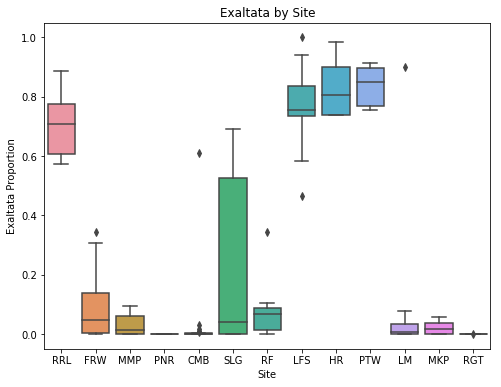

In [355]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='site_id', y='V1', data=pdf)
plt.title('Exaltata by Site')
plt.xlabel('Site')
plt.ylabel('Exaltata Proportion')
plt.show()

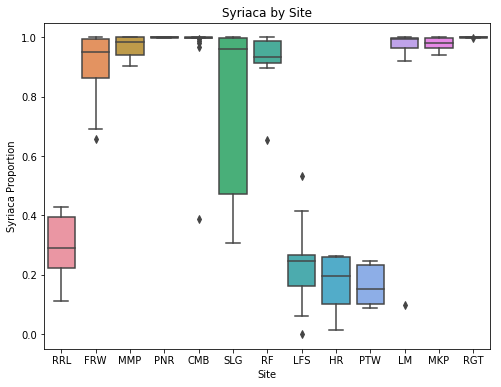

In [356]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='site_id', y='V2', data=pdf)
plt.title('Syriaca by Site')
plt.xlabel('Site')
plt.ylabel('Syriaca Proportion')
plt.show()

## Visualizing Sites by DNA Principal Components

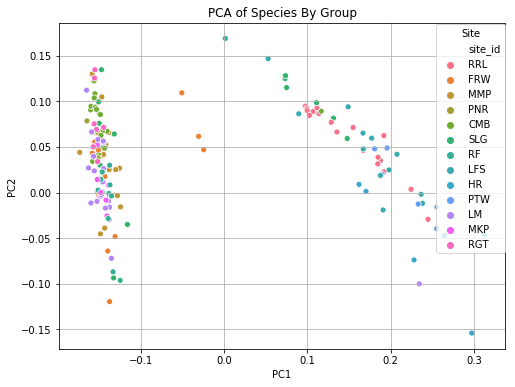

In [357]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pdf, x='PC1', y='PC2', hue='site_id')
plt.title('PCA of Species By Group')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Site', bbox_to_anchor=(1.01, 1.01), loc='upper right')
plt.grid(True)
plt.show()

## Visualizing Species by PC1 and PC2

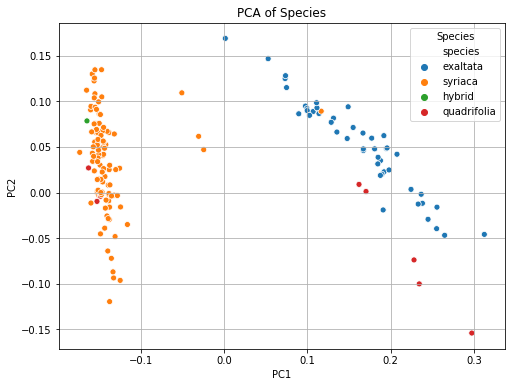

In [358]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pdf, x='PC1', y='PC2', hue='species')
plt.title('PCA of Species')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Species')
plt.grid(True)
plt.show()

## Visualize PCA of Soil Nutrients by Species

In [359]:
pdf.shape

(160, 27)

In [360]:
pdf = pdf[(pdf["species"] == 'syriaca') | (pdf['species'] == 'exaltata')]
pdf.shape

(151, 27)

In [361]:
df = pdf.drop(['V1','V2','PC1','PC2','PC3','PC4','PC5'], axis = 1)

In [362]:
col_names = df.columns
col_names = col_names.drop(['sample_id', 'species', 'site_id', 'collect_date'])

In [363]:
col_names

Index(['OM', 'ENR', 'CEC', 'pH', 'BpH', 'Phosphorus', 'Potassium', 'Calcium',
       'Magnesium', 'Sulfur', 'Sodium', 'Zinc', 'Manganese', 'Iron', 'Copper',
       'Boron'],
      dtype='object')

In [364]:
df.species.unique()

array(['exaltata', 'syriaca'], dtype=object)

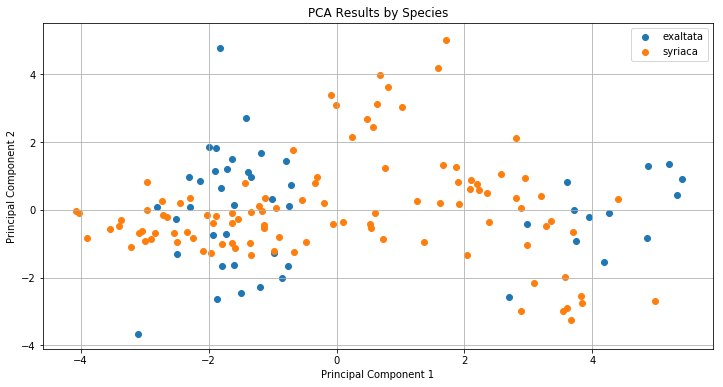

In [365]:
# Step 3: Standardize features separately for each group
grouped = df.groupby('species')
pca_results = {}

for group, group_data in grouped:
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(group_data[col_names])

    # Step 4: Create a PCA instance
    pca = PCA(n_components=2)  # You can adjust the number of components as needed

    # Step 5: Fit the PCA model to the standardized data
    pca.fit(scaled_features)

    # Step 6: Transform the standardized data into the principal component space
    pca_data = pca.transform(scaled_features)

    pca_results[group] = pca_data

# Step 7: Visualize the PCA results for each group
plt.figure(figsize=(12, 6))

for group, pca_data in pca_results.items():
    plt.scatter(pca_data[:, 0], pca_data[:, 1], label=group)

plt.title('PCA Results by Species')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

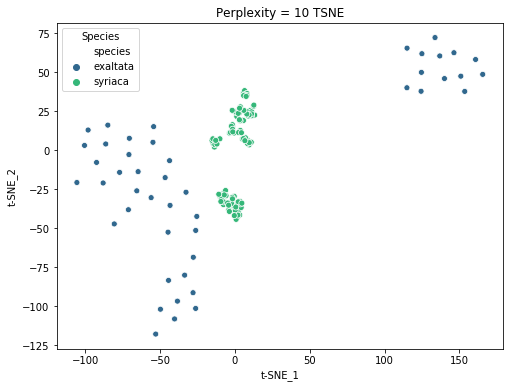

In [376]:
grouped = df.groupby('species')

# Initialize a DataFrame to store the t-SNE results
tsne_results = pd.DataFrame(columns=['t-SNE_1', 't-SNE_2', 'species'])

perplexity_value = 10 # Change this to your desired perplexity

# Step 4: Apply t-SNE to each group
for group_name, group_data in grouped:
    scaler = StandardScaler()
    features = scaler.fit_transform(group_data[col_names])
    
    # Step 5: Perform t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    tsne_transformed = tsne.fit_transform(features)
    
    # Combine the t-SNE results with the 'site' column
    tsne_df = pd.DataFrame(tsne_transformed, columns=['t-SNE_1', 't-SNE_2'])
    tsne_df['species'] = group_name
    
    # Append to the results DataFrame
    tsne_results = tsne_results.append(tsne_df, ignore_index=True)

# Step 6: Visualize the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_results, x='t-SNE_1', y='t-SNE_2', hue='species', palette='viridis')
plt.title('Perplexity = 10 TSNE')
plt.legend(title='Species')
plt.show()

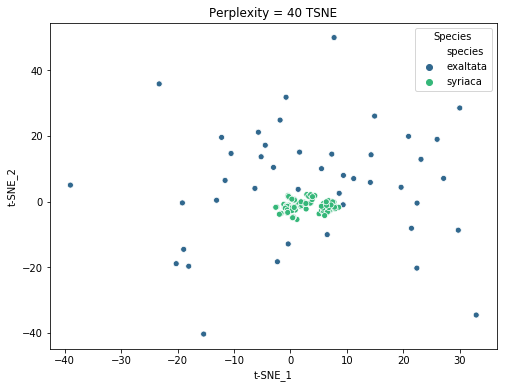

In [378]:
grouped = df.groupby('species')

# Initialize a DataFrame to store the t-SNE results
tsne_results = pd.DataFrame(columns=['t-SNE_1', 't-SNE_2', 'species'])

perplexity_value = 40 # Change this to your desired perplexity

# Step 4: Apply t-SNE to each group
for group_name, group_data in grouped:
    scaler = StandardScaler()
    features = scaler.fit_transform(group_data[col_names])
    
    # Step 5: Perform t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    tsne_transformed = tsne.fit_transform(features)
    
    # Combine the t-SNE results with the 'site' column
    tsne_df = pd.DataFrame(tsne_transformed, columns=['t-SNE_1', 't-SNE_2'])
    tsne_df['species'] = group_name
    
    # Append to the results DataFrame
    tsne_results = tsne_results.append(tsne_df, ignore_index=True)

# Step 6: Visualize the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_results, x='t-SNE_1', y='t-SNE_2', hue='species', palette='viridis')
plt.title('Perplexity = 40 TSNE')
plt.legend(title='Species')
plt.show()

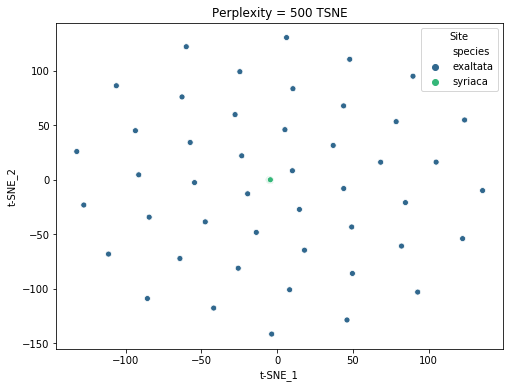

In [377]:
grouped = df.groupby('species')

# Initialize a DataFrame to store the t-SNE results
tsne_results = pd.DataFrame(columns=['t-SNE_1', 't-SNE_2', 'species'])

perplexity_value = 100 # Change this to your desired perplexity

# Step 4: Apply t-SNE to each group
for group_name, group_data in grouped:
    scaler = StandardScaler()
    features = scaler.fit_transform(group_data[col_names])
    
    # Step 5: Perform t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    tsne_transformed = tsne.fit_transform(features)
    
    # Combine the t-SNE results with the 'site' column
    tsne_df = pd.DataFrame(tsne_transformed, columns=['t-SNE_1', 't-SNE_2'])
    tsne_df['species'] = group_name
    
    # Append to the results DataFrame
    tsne_results = tsne_results.append(tsne_df, ignore_index=True)

# Step 6: Visualize the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_results, x='t-SNE_1', y='t-SNE_2', hue='species', palette='viridis')
plt.title('Perplexity = 500 TSNE')
plt.legend(title='Site')
plt.show()

## Statistical Tests to Examine Nutrient Differences between Syriaca and Exaltata

In [269]:
grouped = df.groupby('species')

In [270]:
from scipy import stats

In [271]:
data_list = []
for group, group_data in grouped:
    data_list.append(group_data)

In [272]:
col_names

Index(['OM', 'ENR', 'CEC', 'pH', 'BpH', 'Phosphorus', 'Potassium', 'Calcium',
       'Magnesium', 'Sulfur', 'Sodium', 'Zinc', 'Manganese', 'Iron', 'Copper',
       'Boron'],
      dtype='object')

In [380]:
for nutrient in col_names:
    t_statistic, p_value = stats.ttest_ind(data_list[0][nutrient], data_list[1][nutrient])
    print(nutrient)
    if p_value < 0.05:
        print('SIGNIFIIIICANT!!!!!!!!!!!!!!!!!!!')
    print(p_value)
    print('Exaltata Mean:')
    print((data_list[0][nutrient].mean()))
    print('Syriaca Mean:')
    print((data_list[1][nutrient].mean()))
    print('')
    


OM
SIGNIFIIIICANT!!!!!!!!!!!!!!!!!!!
0.009665346921823428
Exaltata Mean:
22.1
Syriaca Mean:
17.385714285714286

ENR
0.39782540861183013
Exaltata Mean:
150.0
Syriaca Mean:
148.54285714285714

CEC
SIGNIFIIIICANT!!!!!!!!!!!!!!!!!!!
6.147661299151565e-05
Exaltata Mean:
10.332608695652173
Syriaca Mean:
13.50952380952381

pH
SIGNIFIIIICANT!!!!!!!!!!!!!!!!!!!
0.002384466244723897
Exaltata Mean:
5.626086956521741
Syriaca Mean:
5.989523809523811

BpH
0.8506978346922767
Exaltata Mean:
6.695652173913045
Syriaca Mean:
6.701142857142856

Phosphorus
SIGNIFIIIICANT!!!!!!!!!!!!!!!!!!!
0.006983122820335633
Exaltata Mean:
45.17391304347826
Syriaca Mean:
69.22857142857143

Potassium
SIGNIFIIIICANT!!!!!!!!!!!!!!!!!!!
0.03402510888197154
Exaltata Mean:
122.28260869565217
Syriaca Mean:
141.47619047619048

Calcium
SIGNIFIIIICANT!!!!!!!!!!!!!!!!!!!
0.0004984732910308195
Exaltata Mean:
1269.3478260869565
Syriaca Mean:
1746.8761904761905

Magnesium
SIGNIFIIIICANT!!!!!!!!!!!!!!!!!!!
4.11448434491156e-06
Exaltata